# Harder CTD profiles...

Let's take a chance on a harder profile. Here's a plot of the cleaned up data.

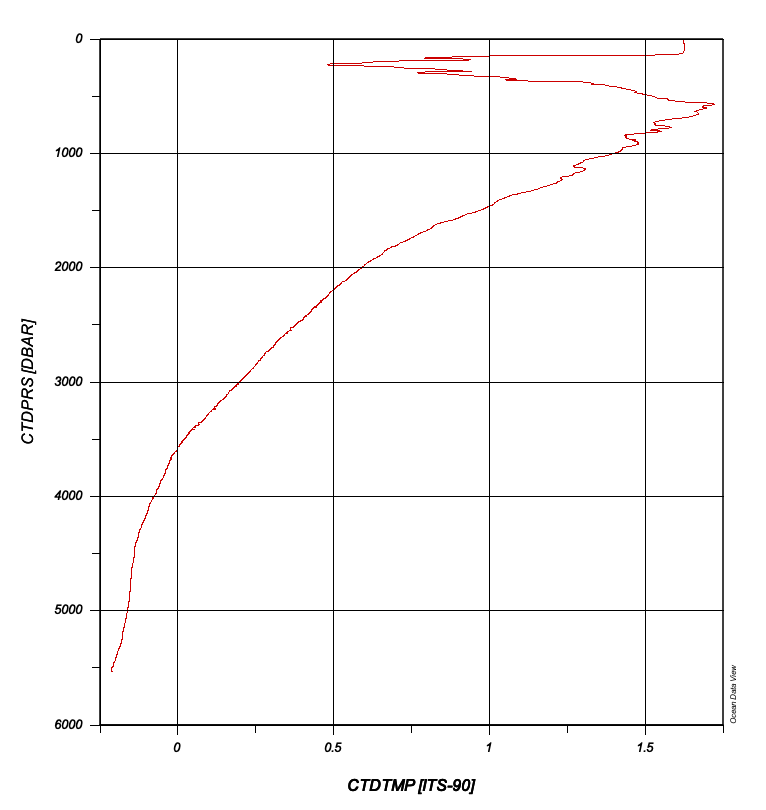

The order of actions for calibration:

1. (Optional) Convert from hex to ASCII
2. Ondeck pressure calibration
3. Align water parcel/pump speed
4. Filter ctd data
5. Remove outliers
6. 

In [1]:
from pathlib import Path
import ctd

In [2]:
#put relative path in here
path = Path('i06_original_resolution_cnv')
#final file name here
fname = path.joinpath('03501.cnv.zip')

Let's plot the temperature without any processing and see what comes out.

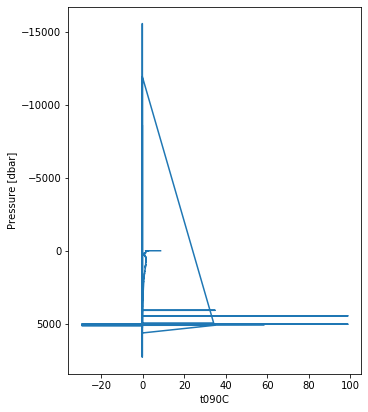

In [3]:
down, up = ctd.from_cnv(fname).split()
ax = down['t090C'].plot_cast()

Huh. Well, the profile has some problems. (Sea cable transmission error, if you believe it or not.) Let's clean it up.

In [4]:
#before you start messing with data, make sure to make a copy first for safety!
down_start = down.copy()
down = down_start.copy()
down_start

,depSM,t090C,c0mS/cm,t190C,c1mS/cm,sal00,sal11,sbox0Mm/Kg,flECO-AFL,turbWETbb0,...,v4,v5,v7,latitude,longitude,timeS,sbeox0V,timeY,altM,flag
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
0.003,0.003,8.6228,5.304265,7.6236,1.137705,4.2746,0.8634,353.842,0.1282,0.006702,...,0.000,0.0,0.0,-55.00146,30.00170,0.000,2.4713,1.556449e+09,0.00,False
-0.029,-0.029,8.6222,5.302244,7.6231,1.137113,4.2729,0.8630,353.850,0.1282,0.006702,...,0.000,0.0,0.0,-55.00146,30.00170,0.042,2.4713,1.556449e+09,0.00,False
-0.029,-0.029,8.6213,5.299614,7.6223,1.136864,4.2707,0.8628,353.865,0.1282,0.006702,...,0.000,0.0,0.0,-55.00146,30.00170,0.083,2.4713,1.556449e+09,0.00,False
-0.029,-0.029,8.6206,5.296603,7.6217,1.136833,4.2682,0.8628,353.877,0.1294,0.006699,...,0.000,0.0,0.0,-55.00146,30.00170,0.125,2.4713,1.556449e+09,0.00,False
-0.029,-0.029,8.6198,5.292715,7.6210,1.136490,4.2650,0.8625,353.893,0.1270,0.006699,...,0.000,0.0,0.0,-55.00146,30.00170,0.167,2.4713,1.556449e+09,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141.136,5034.315,-0.1712,30.624011,-0.1719,30.612421,34.6565,34.6426,225.719,0.0586,0.000080,...,0.011,0.0,0.0,-55.00142,30.00188,8334.125,1.1085,1.556457e+09,0.22,False
5141.226,5034.403,-0.1711,30.623950,-0.1719,30.612243,34.6563,34.6423,226.474,0.0586,0.000080,...,0.011,0.0,0.0,-55.00142,30.00188,8334.167,1.1098,1.556457e+09,0.22,False
5141.269,5034.444,-0.1710,30.623703,-0.1723,30.612362,34.6559,34.6428,226.011,0.0586,0.000080,...,0.011,0.0,0.0,-55.00142,30.00188,8334.208,1.1085,1.556457e+09,0.22,False


The loading routine sets the index on pressure to start, so let's begin by dropping the index.

In [5]:
down = down.reset_index()

In [6]:
#Check in Index that pressure appears as 'Pressure [dbar]'
down.axes

[RangeIndex(start=0, stop=200024, step=1),
 Index(['Pressure [dbar]', 'depSM', 't090C', 'c0mS/cm', 't190C', 'c1mS/cm',
        'sal00', 'sal11', 'sbox0Mm/Kg', 'flECO-AFL', 'turbWETbb0', 'v0', 'v1',
        'v2', 'v3', 'v4', 'v5', 'v7', 'latitude', 'longitude', 'timeS',
        'sbeox0V', 'timeY', 'altM', 'flag'],
       dtype='object')]

Let's remove values are clearly not valid for pressure.

In [7]:
#Values are in decibar
min_depth = 5
max_depth = 6000

#Only accept values that are within acceptable ranges
down = down[down['Pressure [dbar]'] > min_depth]
down = down[down['Pressure [dbar]'] < max_depth]

In [8]:
down

,Pressure [dbar],depSM,t090C,c0mS/cm,t190C,c1mS/cm,sal00,sal11,sbox0Mm/Kg,flECO-AFL,...,v4,v5,v7,latitude,longitude,timeS,sbeox0V,timeY,altM,flag
11419,5.040,4.994,1.9354,30.697667,1.6646,30.051194,34.9691,34.4502,288.628,0.1001,...,0.0122,0.0,0.0,-55.00136,30.00160,475.792,2.1990,1.556449e+09,0.24,False
11420,5.030,4.985,1.9113,30.693101,1.6572,30.050430,34.9901,34.4573,288.479,0.1013,...,0.0122,0.0,0.0,-55.00136,30.00160,475.833,2.1978,1.556449e+09,0.24,False
11421,5.068,5.022,1.8932,30.689584,1.6507,30.049431,35.0057,34.4632,288.481,0.1001,...,0.0122,0.0,0.0,-55.00136,30.00160,475.875,2.1978,1.556449e+09,0.24,False
11422,5.100,5.054,1.8785,30.687116,1.6453,30.048491,35.0189,34.4679,288.481,0.1001,...,0.0122,0.0,0.0,-55.00136,30.00160,475.917,2.1978,1.556449e+09,0.24,False
11423,5.110,5.063,1.8653,30.685451,1.6414,30.048315,35.0314,34.4720,288.240,0.1013,...,0.0122,0.0,0.0,-55.00136,30.00160,475.958,2.1966,1.556449e+09,0.24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200018,5141.093,5034.274,-0.1710,30.623764,-0.1721,30.612539,34.6560,34.6429,225.706,0.0586,...,0.0110,0.0,0.0,-55.00142,30.00188,8334.083,1.1085,1.556457e+09,0.22,False
200019,5141.136,5034.315,-0.1712,30.624011,-0.1719,30.612421,34.6565,34.6426,225.719,0.0586,...,0.0110,0.0,0.0,-55.00142,30.00188,8334.125,1.1085,1.556457e+09,0.22,False
200020,5141.226,5034.403,-0.1711,30.623950,-0.1719,30.612243,34.6563,34.6423,226.474,0.0586,...,0.0110,0.0,0.0,-55.00142,30.00188,8334.167,1.1098,1.556457e+09,0.22,False
200021,5141.269,5034.444,-0.1710,30.623703,-0.1723,30.612362,34.6559,34.6428,226.011,0.0586,...,0.0110,0.0,0.0,-55.00142,30.00188,8334.208,1.1085,1.556457e+09,0.22,False


Okay, we've removed clearly bad data. That's probably enough to try running it again, so let's reset the index to pressure, and remove the extra index.

In [9]:
down = down.set_index('Pressure [dbar]')
# drop 'index' for cleanup
#down = down.drop(columns=['index'])
#down.axes

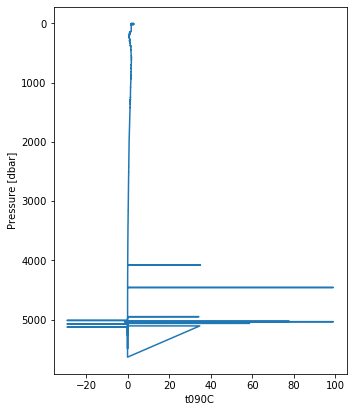

In [10]:
ax = down['t090C'].plot_cast()

In [11]:
#proc = down.remove_above_water()\
#           .despike(n1=2, n2=20, block=100)\
#           .lp_filter()\
#           .press_check()\
#           .interpolate() \
#           .bindata(delta=1)\
#           .smooth(window_len=21, window='hanning')

Remove data out of water... but we've done that already.

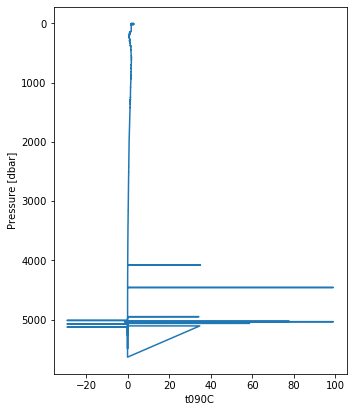

In [12]:
proc = down.remove_above_water()
ax = proc['t090C'].plot_cast()

Remove big spikes from the data.

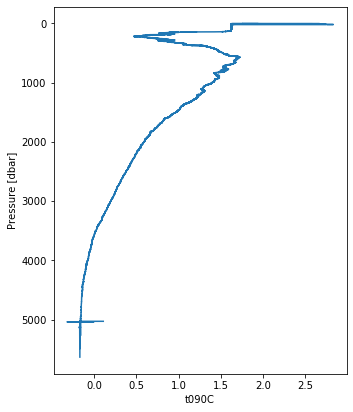

In [13]:
proc = proc.despike(n1=2, n2=20, block=100)
ax = proc['t090C'].plot_cast()

Run a low pass filter over the data.

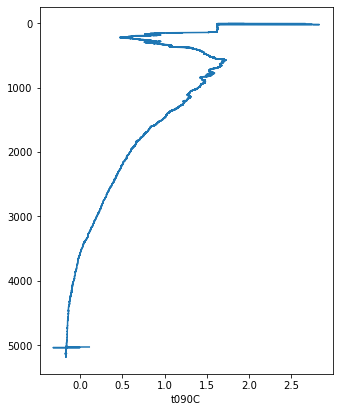

In [14]:
proc = proc.lp_filter()
ax = proc['t090C'].plot_cast()

Remove pressure reversals from the index.

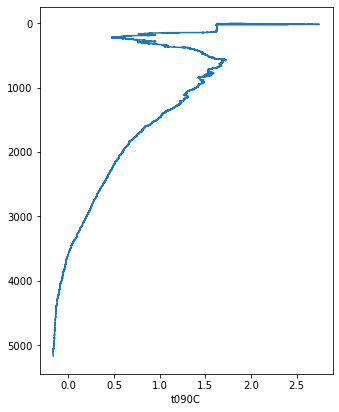

In [15]:
proc = proc.press_check()
ax = proc['t090C'].plot_cast()

Do interpolation using the built-in pandas method. Default setting is linear, but we shouldn't have any bins that need to be interpolated.

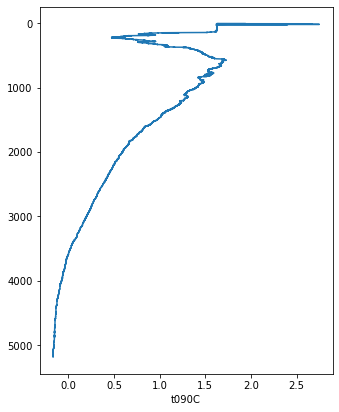

In [16]:
proc = proc.interpolate()
ax = proc['t090C'].plot_cast()

Bin the index to a given value. The index is set to pressure by default, and we've set the value (delta) to 1.

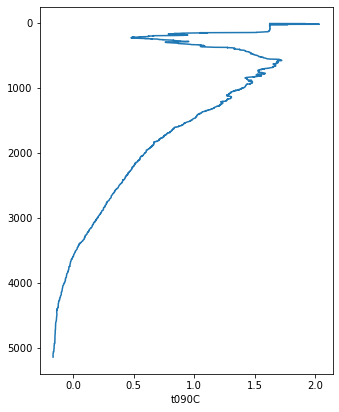

In [17]:
proc = proc.bindata(delta=1)
ax = proc['t090C'].plot_cast()

Smooth the data. There are a few windows to use, here we use Hann or Hanning.

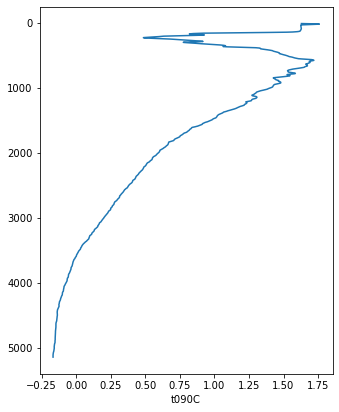

In [18]:
proc = proc.smooth(window_len=21, window='hanning')
ax = proc['t090C'].plot_cast()

What problems are still in the data?

1. The data doesn't extend to the surface.
2. There's a small spike near the surface - this shouldn't happen in the mixed layer especially for temperature.
3. We haven't checked if the temperature water samples are aligned in time with salinity, so there might be a bias.
4. We haven't applied corrections for viscous heating.
5. 

In [19]:
proc.head()

,depSM,t090C,c0mS/cm,t190C,c1mS/cm,sal00,sal11,sbox0Mm/Kg,flECO-AFL,turbWETbb0,...,v4,v5,v7,latitude,longitude,timeS,sbeox0V,timeY,altM,flag
6.5,31.091624,1.629283,29.731364,1.623404,29.688353,34.067104,34.020044,315.656831,0.114135,0.000110,...,0.012166,0.0,0.0,-55.001294,30.001544,671.538117,2.302100,1.556450e+09,0.239143,0.0
7.5,30.062858,1.654355,29.785546,1.624306,29.701075,34.107962,34.035692,311.998223,0.113975,0.000109,...,0.012234,0.0,0.0,-55.001296,30.001548,663.180453,2.283966,1.556450e+09,0.240857,0.0
8.5,29.087157,1.679010,29.837580,1.625231,29.713332,34.146593,34.050698,308.439468,0.113829,0.000108,...,0.012302,0.0,0.0,-55.001299,30.001552,655.151302,2.266258,1.556450e+09,0.242556,0.0
9.5,28.231016,1.702453,29.884551,1.626176,29.724552,34.180237,34.064312,305.171670,0.113707,0.000107,...,0.012366,0.0,0.0,-55.001301,30.001556,647.985282,2.249821,1.556450e+09,0.244167,0.0
10.5,27.571059,1.722401,29.922603,1.627043,29.733840,34.206537,34.075466,302.439904,0.113626,0.000106,...,0.012423,0.0,0.0,-55.001302,30.001559,642.431950,2.235831,1.556450e+09,0.245582,0.0


In [20]:
#ax = proc['t090C'].plot_cast()